### Exploratory Data Analysis on Titanic Dataset

The below notebook demonstrates different techniques of exploratory data analysis and the observations taken from that.

The dataset is downloaded from kaggle.com

Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data using Pandas

In [2]:
train = pd.read_csv("data/titanic_train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Let's get started with the Exploratory Data Analysis

Checking if there are any missing or null values in the dataset

<Axes: >

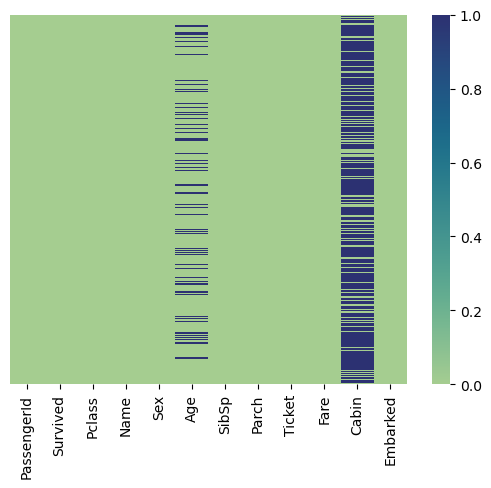

In [3]:
sns.heatmap(data=train.isnull(), yticklabels=False, cmap='crest')

Here we are able to observe that the Age and Cabin columns contains missing values. We need to handle this missing values in an efficient way to achieve greater accuracy.

Now as we have found the presence of the missing values, let's do some more observation in the data.



Let's find the count of the people who survived and who were not able to survive.

<Axes: xlabel='Survived', ylabel='count'>

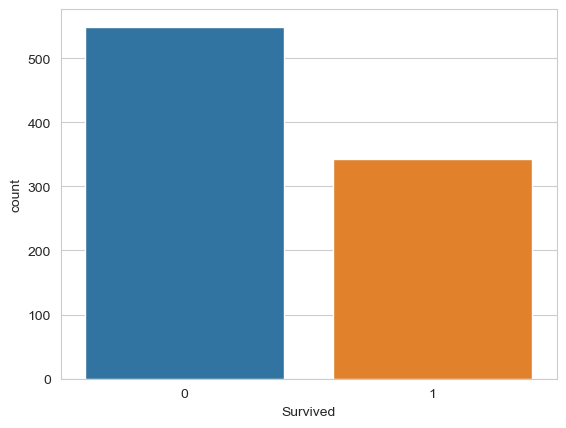

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

Here in the above you can see that only about 320 people out of 890 people were able to survive and other were not able to survive.




Now let' set the gender distribution amongst the people who were able to survive and was failed to survive.

<Axes: xlabel='Survived', ylabel='count'>

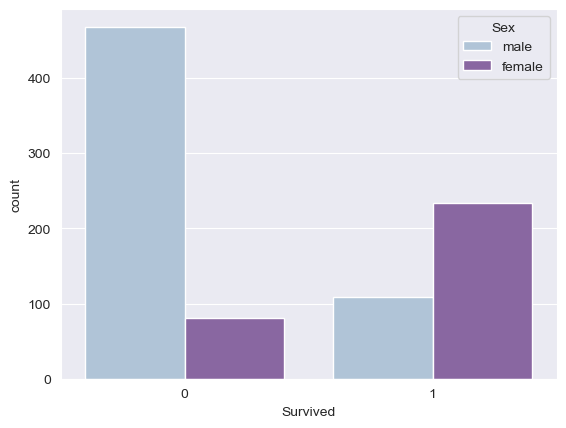

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train,palette='BuPu')

As from the above we can observe that, alot of females were able to survive as compared to males.

Now let's see observe, what class people were travelling amongst the survived ones.

<Axes: xlabel='Survived', ylabel='count'>

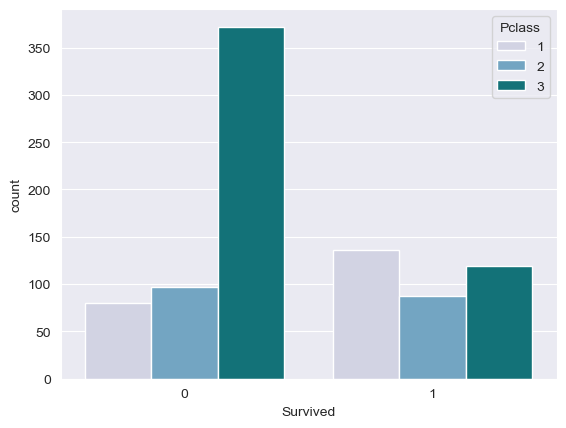

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='PuBuGn')

Here we can see most of the people who survived were travelling from the 1st class and least people able to survive was from 2nd class.

#### Handling Missing Values

As from the heatmap above we were able to conclude that there were missing values in the Age and Cabin column, in the Age column almost 20 percentage of the data was missing.






Let's handle the missing data in the Age column.


<Axes: xlabel='Pclass', ylabel='Age'>

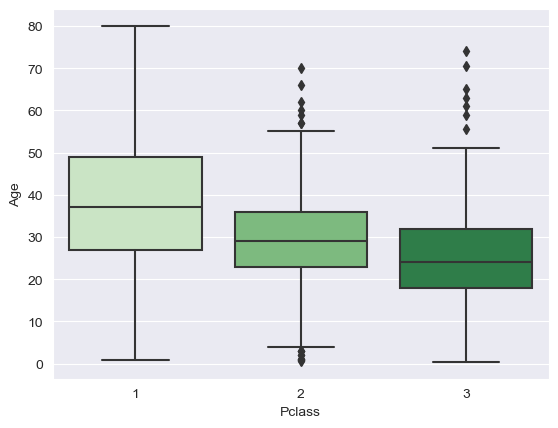

In [14]:
sns.boxplot(y='Age',x='Pclass',data=train,palette='Greens')

We can observe that the average age of the  people who were able to survive from the 1st class was 37 years old, from 2nd class was 28 years old and from the 3rd class was 24 years old.


So we will replace the missing age values with the average ages of particular passanger class.

In [15]:
# creating a function to impute the age value using the mean values according to the class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    
    else:
        return Age

Now applying that function to the Age column

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

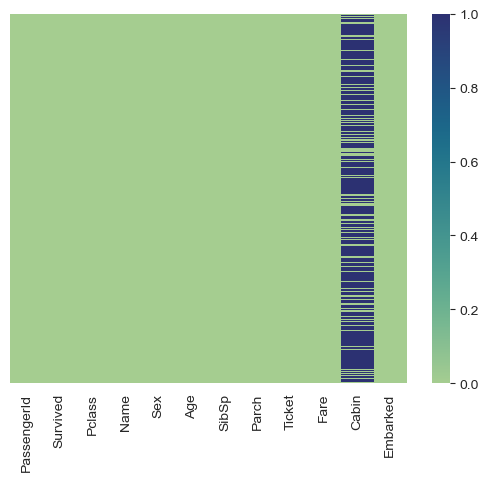

In [17]:
sns.heatmap(data=train.isnull(), yticklabels=False, cmap='crest')

Now we can see that there are no Nan values in the Age Column.


We can see that the 80-90% data in the Cabin column is missing, so its better to drop that column, in order to avoid more redundant data.

In [19]:
train.drop('Cabin',inplace=True, axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

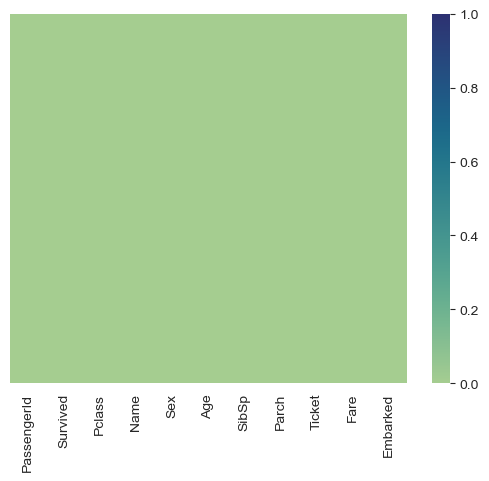

In [20]:
sns.heatmap(data=train.isnull(), yticklabels=False, cmap='crest')

Now Let's convert the Categorical data into numeric data for better understanding of machine

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Creating a category column for embarked using get_dummies function

In [30]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

Now let's drop and replace the original categorical columns with our created numeric columns, also we will be dropping the non-required columns like Name and Ticket.

In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [35]:
train = pd.concat([train,sex,embarked],axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our dataset is fully ready for training purposes, and we can hope best results from the above dataset.

The Exploratory Data Analysis is very essential phase in the Data Science project lifecycle, with the help of which we can achieve best results.